# Reconhecimento de dígitos com CNN (Redes Neurais Convolucionais)

In [37]:
#%pip install tensorflow

In [38]:
# Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [39]:
# Carregando e pré-processamento dos dados
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))/255.0
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)) / 255.0
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [40]:
# 1. Entrada explícita
input_layer = Input(shape=(28, 28, 1), name='entrada')

# 2. Camadas convolucionais
x = Conv2D(32, (3, 3), activation='relu', name='conv1')(input_layer)
x = MaxPooling2D((2, 2), name='pool1')(x)
x = Conv2D(64, (3, 3), activation='relu', name='conv2')(x)
x = MaxPooling2D((2, 2), name='pool2')(x)

# 3. Classificação
x = Flatten(name='flatten')(x)
x = Dense(64, activation='relu', name='dense1')(x)
output_layer = Dense(10, activation='softmax', name='saida')(x)

# 4. Modelo final
model = Model(inputs=input_layer, outputs=output_layer)

# 5. Compilação
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
# Treinamento
history = model.fit(
  X_train, 
  y_train_cat, 
  epochs=5, 
  validation_split=0.2, 
  batch_size=128, 
  callbacks=[EarlyStopping(patience=3, 
                           restore_best_weights=True)])

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.8267 - loss: 0.6100 - val_accuracy: 0.9770 - val_loss: 0.0784
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9787 - loss: 0.0705 - val_accuracy: 0.9818 - val_loss: 0.0579
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9845 - loss: 0.0495 - val_accuracy: 0.9827 - val_loss: 0.0589
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9896 - loss: 0.0352 - val_accuracy: 0.9873 - val_loss: 0.0422
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9909 - loss: 0.0297 - val_accuracy: 0.9868 - val_loss: 0.0438


In [42]:
# Avaliação
loss, acc = model.evaluate(X_test, y_test_cat)
print(f'Acurácia: {acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9857 - loss: 0.0443
Acurácia: 0.9886


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


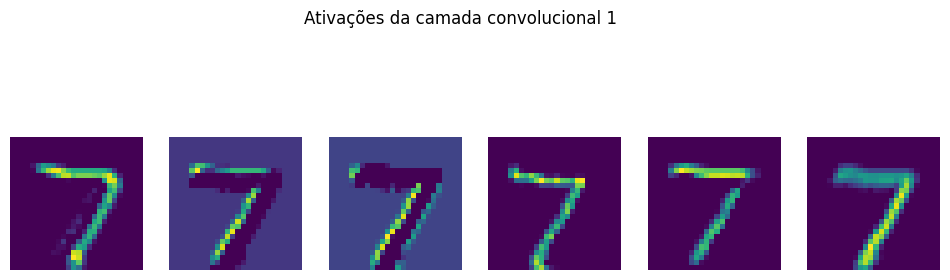

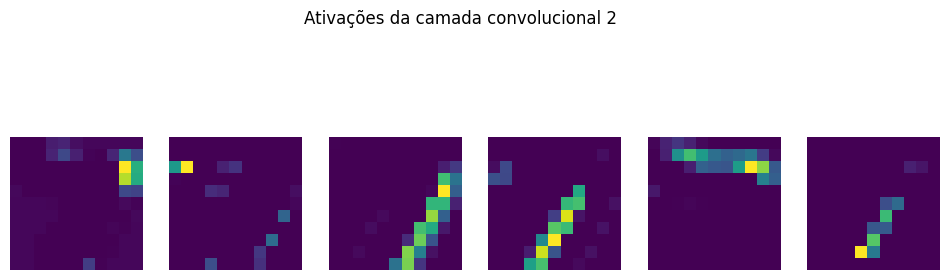

In [45]:
#visualização
# Garantindo formato da imagem
img = X_test[0].reshape(1, 28, 28, 1)

# Criar modelo intermediário que retorna as ativações
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

# Gerar ativações
activations = activation_model.predict(img)

# Plotar primeiras ativações
for i, activation in enumerate(activations):
    plt.figure(figsize=(12, 4))
    for j in range(min(activation.shape[-1], 6)):
        plt.subplot(1, 6, j + 1)
        plt.imshow(activation[0, :, :, j], cmap='viridis')
        plt.axis('off')
    plt.suptitle(f'Ativações da camada convolucional {i + 1}')
    plt.show()